IndexError: index 50 is out of bounds for axis 0 with size 50

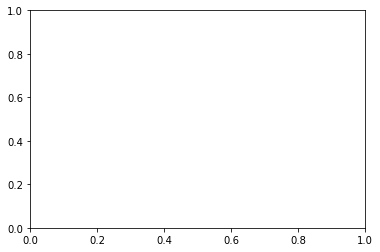

In [66]:
# Model design
import agentpy as ap

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython

import random

class ForestModel(ap.Model):

    def setup(self):

        # Create agents (trees)
        n_trees = int(self.p.Trees)
        trees = self.agents = ap.AgentList(self, n_trees)
        
        trees2 = self.agents2 = ap.AgentList(self, n_trees)

        # Create grid (forest)
        self.forest = ap.Grid(self, [self.p.size]*2, track_empty=True)
        
        spawnX = [round(self.p.size - 4), round(self.p.size - 3), round(self.p.size - 2), 
                  round(self.p.size - 1), round(self.p.size)]
        spawnY = [round(self.p.size/2 - 4), round(self.p.size/2 - 3), round(self.p.size/2 - 2), 
                  round(self.p.size/2 - 1), round(self.p.size/2)]
        goodRange = self.forest.agents
        spawn1 = [(random.choice(spawnX), random.choice(spawnY)) for x in range(len(trees))]
        
        self.forest.add_agents(trees, positions = spawn1, empty=True)
        
        spawnX2 = [0, 1, 2, 3, 4]
        
        spawnY2 = [round(self.p.size/2), round(self.p.size/2 + 1), round(self.p.size/2 + 2), 
                   round(self.p.size/2 + 3), round(self.p.size/2 + 4)]
        spawn2 = [(random.choice(spawnX2), random.choice(spawnY2)) for x in range(len(trees2))]
        
        self.forest.add_agents(trees2, positions = spawn2, empty=True)
        

        # Initiate a dynamic variable for all trees
        # Condition 0: Alive, 1: Burning, 2: Burned
        self.agents.condition = 1
        self.agents2.condition = 1

        # Start a fire from the left side of the grid
        """
        unfortunate_trees = self.forest.agents[0:5, round(self.p.size/2):round(self.p.size/2 + 5)]
        unfortunate_trees.condition = 1
        
        unfortunate_trees2 = self.forest.agents[round(self.p.size - 5):round(self.p.size), 
                                                round(self.p.size/2 - 5):round(self.p.size/2)]
        unfortunate_trees2.condition = 1
        """


    def step(self):

        # Select burning trees
        burning_trees = self.agents.select(self.agents.condition == 1)

        # Spread fire
        for tree in burning_trees:
            for neighbor in self.forest.neighbors(tree):
                if neighbor.condition == 0:
                    neighbor.condition = 1 # Neighbor starts burning
            tree.condition = 2 # Tree burns out

        # Stop simulation if no fire is left
        if len(burning_trees) == 0:
            self.stop()

    def end(self):

        # Document a measure at the end of the simulation
        burned_trees = len(self.agents.select(self.agents.condition == 2))
        self.report('Percentage of burned trees',
                    burned_trees / len(self.agents))

# Define parameters

parameters = {
    'Trees': 5, # Percentage of grid covered by trees
    'size': 50, # Height and length of the grid
    'steps': 100,
}

# Create single-run animation with custom colors

def animation_plot(model, ax):
    attr_grid = model.forest.attr_grid('condition')
    color_dict = {0:'#7FC97F', 1:'#d62c2c', 2:'#e5e5e5', None:'#d5e5d5'}
    ap.gridplot(attr_grid, ax=ax, color_dict=color_dict, convert=True)
    ax.set_title(f"Simulation of a forest fire\n"
                 f"Time-step: {model.t}, Trees left: "
                 f"{len(model.agents.select(model.agents.condition == 0))}")

fig, ax = plt.subplots()
model = ForestModel(parameters)
animation = ap.animate(model, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml(fps=15))